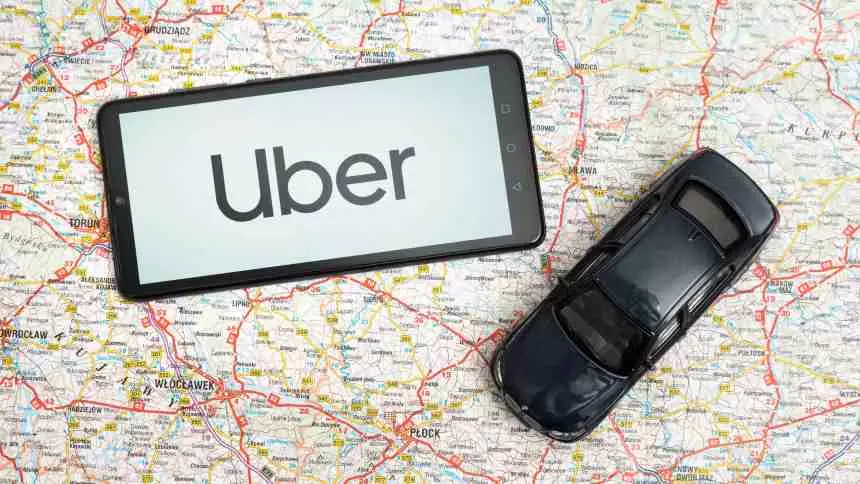

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
uber_df = pd.read_csv("UberDataset.csv")

In [3]:
uber_df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [4]:
n_rows = uber_df.shape[0]
n_cols = uber_df.shape[1]

print(f'The uber dataset contains {n_rows} rows and {n_cols} columns')

The uber dataset contains 1156 rows and 7 columns


In [5]:
uber_df.duplicated().sum()

1

In [6]:
uber_df.drop_duplicates(inplace=True)

In [7]:
uber_df.duplicated().sum()

0

In [8]:
uber_df.columns

Index(['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP', 'MILES',
       'PURPOSE'],
      dtype='object')

In [9]:
uber_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1155 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1155 non-null   object 
 1   END_DATE    1154 non-null   object 
 2   CATEGORY    1154 non-null   object 
 3   START       1154 non-null   object 
 4   STOP        1154 non-null   object 
 5   MILES       1155 non-null   float64
 6   PURPOSE     652 non-null    object 
dtypes: float64(1), object(6)
memory usage: 72.2+ KB


In [10]:
uber_df.isnull().sum()

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

In [11]:
uber_df.dtypes

START_DATE     object
END_DATE       object
CATEGORY       object
START          object
STOP           object
MILES         float64
PURPOSE        object
dtype: object

In [12]:
uber_df["PURPOSE"].fillna("Unknown", inplace=True)

In [13]:
uber_df.dropna(inplace=True)

In [14]:
uber_df.isnull().sum()

START_DATE    0
END_DATE      0
CATEGORY      0
START         0
STOP          0
MILES         0
PURPOSE       0
dtype: int64

In [15]:
uber_df.shape

(1154, 7)

In [16]:
# convert types
uber_df['START_DATE']=pd.to_datetime(uber_df['START_DATE'])
uber_df['END_DATE']=pd.to_datetime(uber_df['END_DATE'])

In [17]:
uber_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1154 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  1154 non-null   datetime64[ns]
 1   END_DATE    1154 non-null   datetime64[ns]
 2   CATEGORY    1154 non-null   object        
 3   START       1154 non-null   object        
 4   STOP        1154 non-null   object        
 5   MILES       1154 non-null   float64       
 6   PURPOSE     1154 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 72.1+ KB


### EDA

In [18]:
uber_df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Unknown
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


** Average Miles by purpose

In [19]:
uber_df['PURPOSE'].unique()

array(['Meal/Entertain', 'Unknown', 'Errand/Supplies', 'Meeting',
       'Customer Visit', 'Temporary Site', 'Between Offices',
       'Charity ($)', 'Commute', 'Moving', 'Airport/Travel'], dtype=object)

In [20]:
avg_miles_by_purpose= uber_df.groupby('PURPOSE')['MILES'].mean().sort_values(ascending=False)
avg_miles_by_purpose

PURPOSE
Commute            180.200000
Customer Visit      20.688119
Meeting             15.276344
Charity ($)         15.100000
Between Offices     10.944444
Temporary Site      10.474000
Unknown              9.748008
Meal/Entertain       5.698125
Airport/Travel       5.500000
Moving               4.550000
Errand/Supplies      3.968750
Name: MILES, dtype: float64

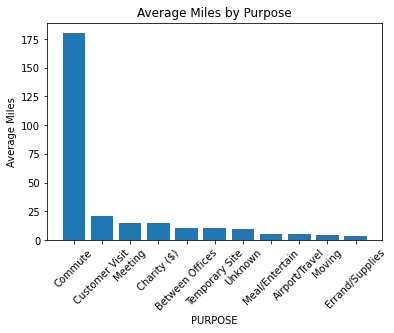

In [21]:
plt.bar(avg_miles_by_purpose.index, avg_miles_by_purpose.values)
plt.xlabel("PURPOSE")
plt.ylabel("Average Miles")
plt.title('Average Miles by Purpose')
plt.xticks(rotation=45)
plt.show()

#### Average Miles By Category

In [22]:
uber_df['CATEGORY'].unique()

array(['Business', 'Personal'], dtype=object)

In [23]:
avg_miles_by_category= uber_df.groupby('CATEGORY')['MILES'].mean().sort_values(ascending=False)
avg_miles_by_category

CATEGORY
Business    10.656546
Personal     9.320779
Name: MILES, dtype: float64

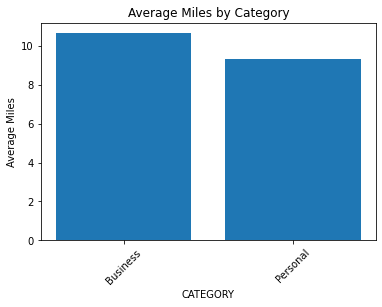

In [24]:
plt.bar(avg_miles_by_category.index, avg_miles_by_category.values)
plt.xlabel("CATEGORY")
plt.ylabel("Average Miles")
plt.title('Average Miles by Category')
plt.xticks(rotation=45)
plt.show()

#### Count of Trips by Category

In [25]:
count_trips=uber_df['CATEGORY'].value_counts().reset_index().rename(columns={'index':'Category',"CATEGORY":"Counts"})
count_trips

,Category,Counts
0,Business,1077
1,Personal,77


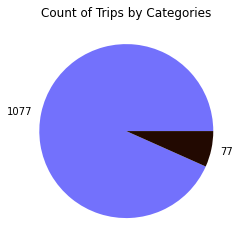

In [26]:
color = ['#7371FC', '#220901']
         
plt.pie(count_trips.Counts, colors=color, labels=count_trips.Counts)
plt.title("Count of Trips by Categories")
plt.show()

#### Min, Max and Average Durations

In [27]:
uber_df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Unknown
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


#### Add a new coloumn subtract end date and start date

In [28]:
uber_df['DURATION']= uber_df['END_DATE']-uber_df["START_DATE"]

In [29]:
uber_df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,DURATION
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,0 days 00:06:00
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Unknown,0 days 00:12:00
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,0 days 00:13:00
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,0 days 00:14:00
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,0 days 01:07:00


In [30]:
uber_df['DURATION'].min()

Timedelta('0 days 00:00:00')

In [31]:
uber_df['DURATION'].max()

Timedelta('0 days 05:36:00')

In [32]:
uber_df['DURATION'].mean()

Timedelta('0 days 00:23:14.506065857')

#### Count of trips by purpose

In [33]:
count_trips_by_purpose=uber_df['PURPOSE'].value_counts().reset_index().rename(columns={'index':'Purpose',"PURPOSE":"Counts"})
count_trips_by_purpose

,Purpose,Counts
0,Unknown,502
1,Meeting,186
2,Meal/Entertain,160
3,Errand/Supplies,128
4,Customer Visit,101
5,Temporary Site,50
6,Between Offices,18
7,Moving,4
8,Airport/Travel,3
9,Charity ($),1


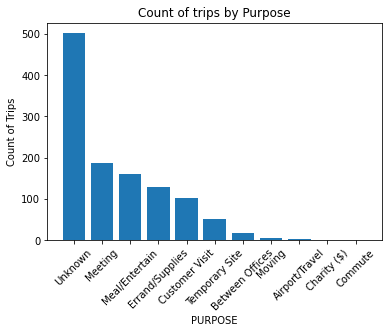

In [39]:
plt.bar(count_trips_by_purpose["Purpose"], count_trips_by_purpose['Counts'])
plt.xlabel("PURPOSE")
plt.ylabel("Count of Trips")
plt.title('Count of trips by Purpose')
plt.xticks(rotation=45)
plt.show()